In [51]:
from preprocessing import *
from import_data import *
from plotting import *
data_dir = 'DataCollection/outputs/'
ssvep_dir = data_dir + 'SSVEP/sess2/'
bci_dir = '../Documents/OpenBCI_GUI/Recordings/OpenBCISession_2023-03-10_14-09-51/'
col_names = ['Fp1', 'O1', 'O2','C3','C4','P3','P4','Pz']
ssvep_files = get_files(ssvep_dir)
bci_files = get_files(bci_dir)

In [52]:
ssvep_files

['DataCollection/outputs/SSVEP/sess2/2023-03-10T14:06:15.830513_baseline.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:06:15.830513_metadata.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_10.00Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_10.80Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_11.60Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_12.40Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_13.20Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_14.00Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_14.80Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_15.60Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_8.40Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_9.20Hz.txt',
 'DataCollection/outputs/SSVEP/sess2/2023-03-10T14:16:34.360184_

In [53]:
eeg_file = ssvep_files[9]
openbci_file = bci_files[1]

In [54]:
eeg = read_file(eeg_file, col_names)
openbci, num_channels, Fs, column_names = read_openbci_file(openbci_file)
idx = get_idx(openbci, column_names, eeg, col_names)
baseline_correct(openbci, column_names, eeg, col_names, idx)

In [57]:
def filter_eeg_test(eeg, Fs, low, high, notch_freq=60.0):
    filtered_eeg = pd.DataFrame()
    for chan in eeg.columns:
        #filtered_eeg[chan] = eeg[chan][int(Fs*0.5):int(-Fs*0.5)]
        filtered_eeg[chan] = butter_notch(eeg[chan], Fs, notch_freq)
        filtered_eeg[chan] = butter_band(filtered_eeg[chan], Fs, low, high)
    return filtered_eeg

In [58]:
filtered_eeg = filter_eeg_test(eeg, Fs, low=1, high=124)

In [59]:
filtered_eeg

,Fp1,O1,O2,C3,C4,P3,P4,Pz
0,-38.881465,8.388508,-2.981386,1.440873,0.437298,2.091161,3.904725,3.872328
1,-77.891596,49.611238,-31.989401,24.502564,-0.844998,18.165659,37.840545,31.574903
2,-107.815289,51.466458,-37.520352,19.339747,-2.381698,0.363491,44.219186,35.154696
3,-98.750306,21.562483,-0.339579,-7.016513,-4.266855,-16.630056,20.496484,14.843661
4,-89.302776,1.168094,20.339654,-14.462377,-1.805761,-13.106268,15.373011,8.448523
...,...,...,...,...,...,...,...,...
1745,0.945738,-11.351705,0.275304,-2.463263,-0.392728,-5.497852,-3.902125,-1.907938
1746,-10.889798,7.057587,-18.359007,11.483351,0.257221,3.172836,14.056666,11.791066
1747,-34.975296,29.901676,-41.168639,23.331745,-0.612588,9.668177,24.357576,22.597186
1748,-23.092350,16.785464,-24.942428,13.491626,-0.990178,5.530506,14.903755,12.383439


(0.0, 30.0)

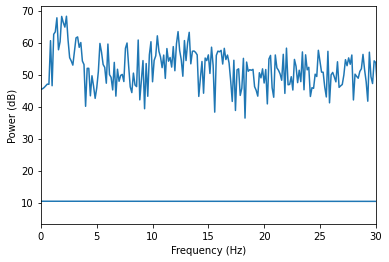

In [61]:
freqs, ps = power_spectrum(filtered_eeg, Fs)
plot_power(freqs, ps, 'O1', Fs, 100)
plt.xlim(0,30)

In [65]:
freqs.shape

(1750,)